# E-Commerce Sales Analysis

This project analyzes the **Online Retail Dataset** from Kaggle.  
The goal is to explore:
- Customer purchase behavior  
- Sales trends over time  
- Top products and countries contributing to sales  

This notebook demonstrates data cleaning, exploration, and visualization using Python.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("data.csv", encoding="ISO-8859-1")

# Show first 5 rows
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Data Cleaning

Steps:
1. Handle missing values  
2. Remove duplicates  
3. Filter invalid records (e.g., negative quantity or price)  
 

In [7]:
# Check missing values
df.isnull().sum()

# Drop missing CustomerID (if any)
df = df.dropna(subset=['CustomerID'])

# Remove duplicates
df = df.drop_duplicates()

# Remove negative quantity and price
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   Month        392692 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(4), period[M](1)
memory usage: 30.0+ MB


## Exploratory Data Analysis (EDA)

We analyze:
- Top-selling products  
- Revenue by country  
- Monthly sales trends  


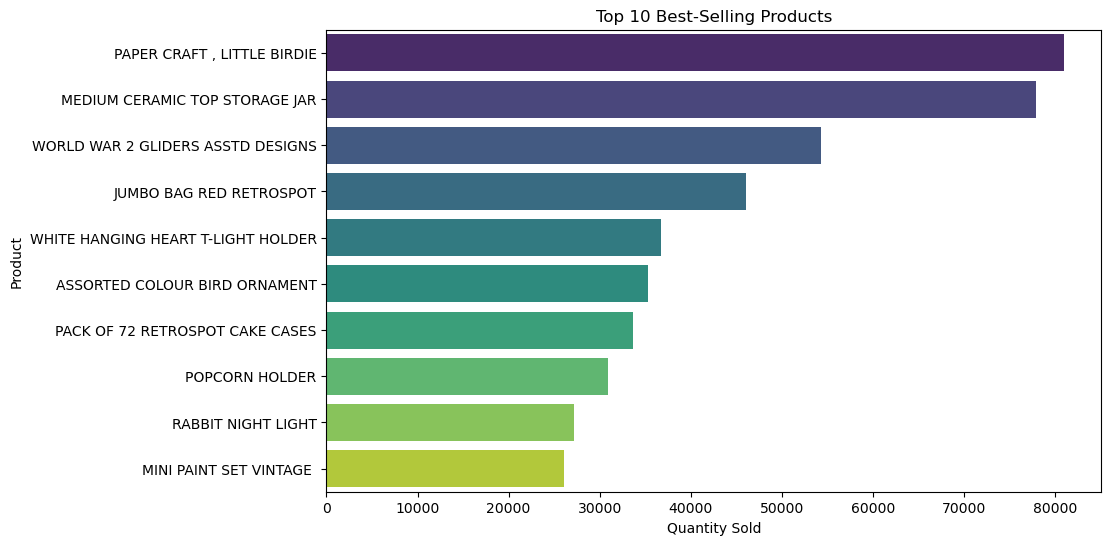

In [3]:
top_products = (df.groupby('Description')['Quantity']
                  .sum()
                  .sort_values(ascending=False)
                  .head(10))

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette="viridis", dodge=False,legend=False)
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product")

# Save the figure
plt.savefig("assets/top_products.png", dpi=300, bbox_inches="tight")
plt.show()


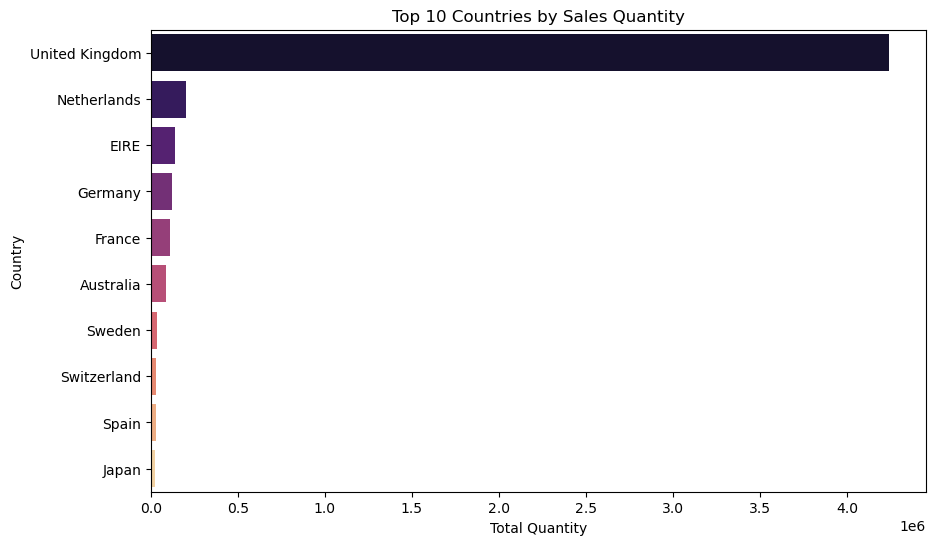

In [4]:
country_revenue = (df.groupby('Country')['Quantity']
                     .sum()
                     .sort_values(ascending=False)
                     .head(10))

plt.figure(figsize=(10,6))
sns.barplot(x=country_revenue.values, y=country_revenue.index, hue = country_revenue.index, palette="magma", dodge=False, legend=False)
plt.title("Top 10 Countries by Sales Quantity")
plt.xlabel("Total Quantity")
plt.ylabel("Country")

# Save the figure
plt.savefig("assets/top_countries.png", dpi=300, bbox_inches="tight")
plt.show()

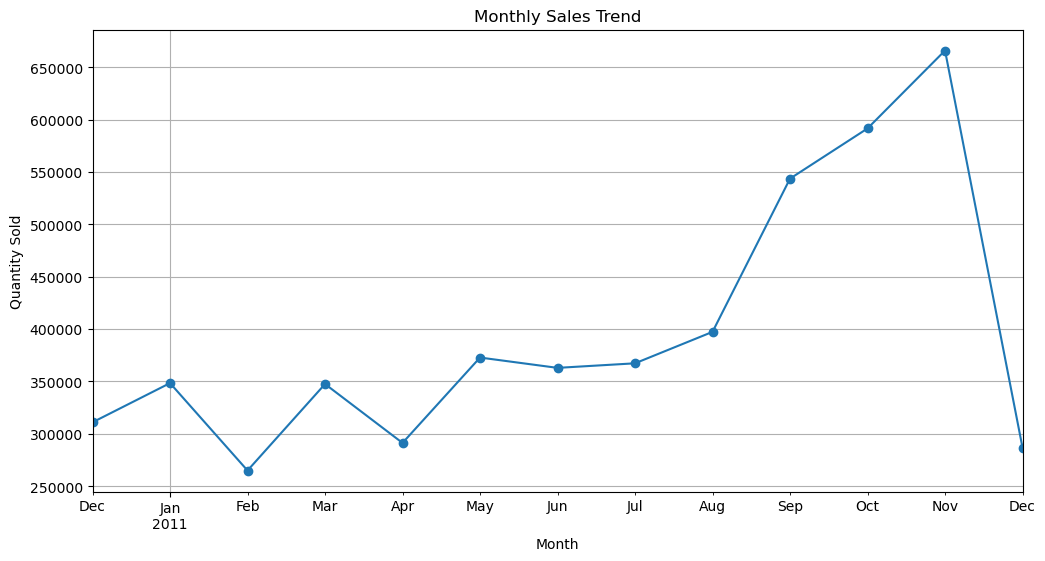

In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Quantity'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Quantity Sold")
plt.grid(True)

# Save the figure
plt.savefig("assets/monthly_sales.png", dpi=300, bbox_inches="tight")
plt.show()


# 📊 Conclusion & Business Insights

## 1. Best-Selling Products
- The top products are primarily gift-related items such as Paper Craft, Ceramic Storage Jars, and Retrospot Bags.  
- This highlights that the company’s main strength lies in low-cost, high-volume decorative goods, which are popular for bulk purchasing.  

## 2. Top Countries by Sales
- The United Kingdom accounts for the overwhelming majority of sales.  
- Other significant markets include Netherlands, Germany, France, and Australia, though sales volumes are much smaller compared to the UK.  
- This suggests the business is highly concentrated in the UK, with opportunities to expand internationally.  

## 3. Monthly Sales Trend
- Sales follow a seasonal pattern, with a sharp increase between September and November, peaking in November.  
- This spike aligns with the holiday season (Christmas shopping), confirming strong demand during this period.  
- Seasonal demand cycles imply that inventory and marketing strategies should be adjusted ahead of Q3/Q4.  

---

# 🚀 Recommendations
- **Inventory Planning** → Increase stock for popular items (e.g., Paper Craft, Ceramic Storage Jars) before the holiday surge.  
- **Market Expansion** → Explore strategies to strengthen presence outside the UK to diversify revenue.  
- **Targeted Marketing** → Run promotional campaigns in Q3 and Q4 to capture seasonal sales growth.  

---

✅ This analysis provides clear insights into customer preferences, market concentration, and seasonality.  
✅ These findings can guide strategic decisions in sales, marketing, and supply chain management.  
